<a href="https://colab.research.google.com/github/Deepak-Data-Scientist-IIT/Stochastic-Gradient-Descent-SGD-/blob/master/Stochastic_Gradient_Descent(SGD)_with_momentum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Creating the input array
X=np.array([[1,0,1,0], [1,0,1,1], [0,1,0,1]])

# Converting the input in matrix
X = X.T
print('\n input:')
print(X)

# Shape of input array
print('\n shape of array:', X.shape)


 input:
[[1 1 0]
 [0 0 1]
 [1 1 0]
 [0 1 1]]

 shape of array: (4, 3)


In [3]:
# creating the output array
y=np.array([[1],[1],[0]])

# Output in matrix form
y = y.T
print('\n Actual Output:')
print(y)

# Shape of Output array
print('\n shape of output:', y.shape)


 Actual Output:
[[1 1 0]]

 shape of output: (1, 3)


In [4]:
# Defining the sigmoid function
def sigmoid (x):
  return 1/(1 + np.exp(-x))

In [5]:
# Defining the Hyperparameter of the model
lr = 0.01 # Learning Rate
inputlayer_neurons = X.shape[0] # Number of feature in dataset
hiddenlayer_neurons = 3 # Number of hidden layer neurons
output_neurons = 1  # Number of neurons at output layer

epochs = 10000  # Number of epochs

In [7]:
# initializing weight
w_ih = np.random.uniform(size=(inputlayer_neurons, hiddenlayer_neurons))
w_ho = np.random.uniform(size=(hiddenlayer_neurons, output_neurons))

In [8]:
# defining the momentum parameters
beta = 0.9
v_ho = 0
v_ih = 0

In [13]:
error_momentum = []
for i in range(epochs):
  # Forward Propogation

  # hidden layer activation
  hidden_layer_input = np.dot(w_ih.T, X)
  hiddenlayer_activations= sigmoid(hidden_layer_input)
  
  # Calculating the output
  output_layer_input = np.dot(w_ho.T, hiddenlayer_activations)
  output = sigmoid(output_layer_input)


  # Backward Propogation

  # Calculating error
  error = np.square(y-output)/2
  error_wrt_output = -(y-output)
  output_wrt_Z2 = np.multiply(output,(1-output))
  Z2_wrt_who = hiddenlayer_activations


  # rate of change of error w.r.t weight between output and hidden layer
  error_wrt_who = np.dot(Z2_wrt_who,(error_wrt_output*output_wrt_Z2).T)
  Z2_wrt_h1 = w_ho
  h1_wrt_Z1= np.multiply(hiddenlayer_activations,(1-hiddenlayer_activations))
  Z1_wrt_wih = X

  # rate of change of error w.r.t weights between input and hidden layer
  error_wrt_wih = np.dot(Z1_wrt_wih,(h1_wrt_Z1*np.dot(Z2_wrt_h1,(error_wrt_output*output_wrt_Z2))).T)

  # weighted gradient
  v_ho = beta * v_ho + (1-beta)* error_wrt_who
  w_ho = w_ho - lr * v_ho
  v_ih = beta * v_ih + (1-beta)* error_wrt_wih
  w_ih = w_ih - lr * v_ih

  # appending the error of each epoch
  error_momentum.append(np.average(error))

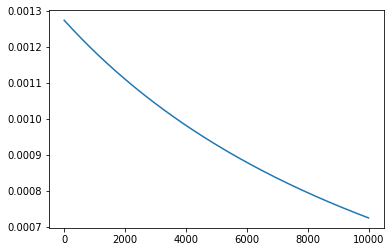

In [14]:
# visualizing the error after each epoch
plt.plot(np.arange(1,epochs+1), np.array(error_momentum))